In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit
import matplotlib.pyplot as plt

{}

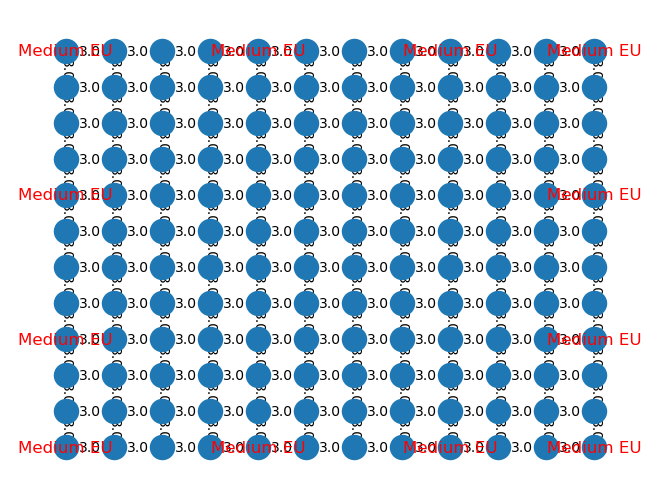

In [2]:
city = main.configure_city_file('corner_medium_ps.txt')
units = EmergencyUnit.response_buildings
small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]
small_emergency_unit_labels = dict()
medium_emergency_unit_labels = dict()
large_emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in small_unit_locs:
        small_emergency_unit_labels[node_coordinates[i]] = 'Small EU'
    elif node_coordinates[i] in medium_unit_locs:
        medium_emergency_unit_labels[node_coordinates[i]] = 'Medium EU'
    elif node_coordinates[i] in large_unit_locs:
        large_emergency_unit_labels[node_coordinates[i]] = 'Large EU'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='r')

In [3]:
resp_times, successful_perc, emergencies, plotting_emergency_dict = main.simulate(city)
# traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
# nx.draw(city.city_graph, pos)
# nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
# nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


[Text(0.5, 0, 'Number of Simulation Runs'),
 Text(0, 0.5, 'Average Percentage of Successfully Responded Emergencies')]

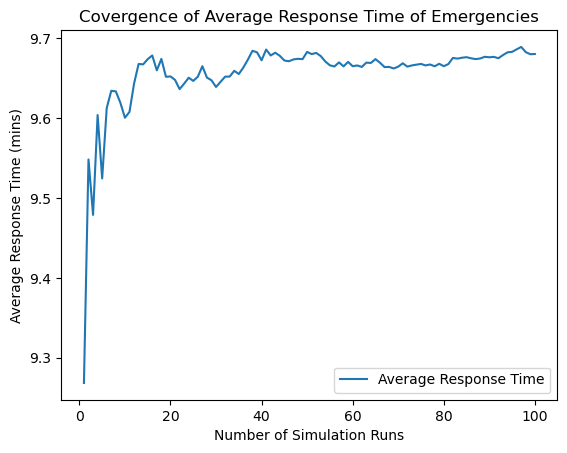

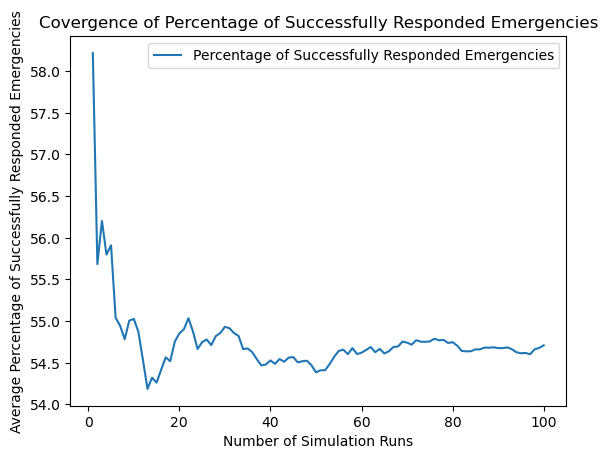

In [4]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
# plot1.show()
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, index = [_ for _ in range(1, 101)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
# plot2.show()

In [ ]:
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

In [5]:
node_coordinates=list(city.city_graph.nodes)
node_identifier = [{} for key in plotting_emergency_dict]
color_map= [{} for key in plotting_emergency_dict]
edges_to_draw = [[] for key in plotting_emergency_dict]
counter = 0
units_to_plot = [unit.location for unit in units]
for emergency in plotting_emergency_dict:
    units_to_show = plotting_emergency_dict[emergency]
    for i in range(len(node_coordinates)):
        if node_coordinates[i] == emergency:
            color_map[counter][node_coordinates[i]] = "red"
            node_identifier[counter][node_coordinates[i]] = "E"
        elif node_coordinates[i] in units_to_plot:
            color_map[counter][node_coordinates[i]] = "green"
            node_identifier[counter][node_coordinates[i]] = "EU"
        else:
            color_map[counter][node_coordinates[i]] = "black"
    for unit in units_to_show:
        path = nx.shortest_path(city.city_graph, source=emergency, target=unit)
        path_edges = list(zip(path, path[1:]))
        for p in path_edges:
            edges_to_draw[counter].append(p)
    counter += 1
#colors = [ color_map.get(node) for node in city.city_graph.nodes]

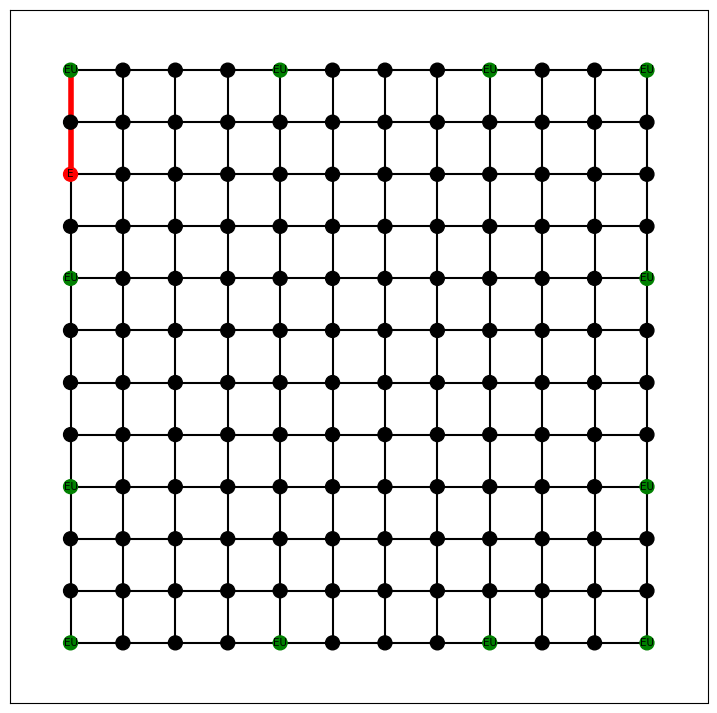

In [6]:
obs = 0
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = 100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='black',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=4)
plt.show()

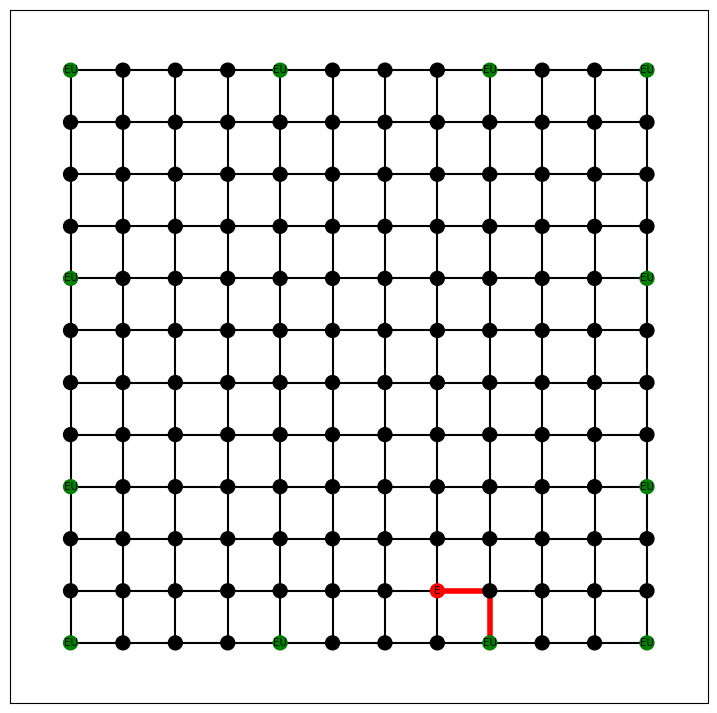

In [7]:
obs = 1
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = 100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='black',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=4)
plt.show()

In [ ]:
Hypothesis 1
In this hypothesis we consider different configurations of 12 medium type emergency unit buildings distributed across the city.
Case 1 : All the emergency response units are placed on the corners.
Case 2: All the emergency response units are placed in a
Case 3: We consider a hybrid scenario where half the units are placed on the corners, the other half are placed in the interior region.
Building on the previous hypothesis involving 12 medium type emergency unit buildings distributed across the city, let us consider the costs of establishing and maintaining each type of building as follows (in terms of a fictional unit of money SPY):
Small Emergency Unit - 3000 SPY
Medium Emergency Unit - 4500 SPY
Large Emergency Unit - 7000 SPY
12 medium type buildings lead to a cost of 54,000 SPY. So, let us analyze how a budget of 54,000 SPY units of money provided to the city planner can be optimally allocated across the small, medium and large types of buildings, to minimize the average response time and maximize the average percentage of successfully responded emergencies.
Case 1: Considering greater number of small unit buildings than medium unit buildings, which are greater than the number of large unit buildings: 7 small (21,000 SPY), 4 medium (18,000 SPY) and 2 large (14,000 SPY). These buildings are distributed evenly across the city.
Case 2: Considering greater number of larger unit buildings than medium unit buildings, which are greater than the number of small unit buildings: 1 small (3,000 SPY), 3 medium (13,500 SPY) and 5 large (35,000 SPY). These buildings are distributed evenly across the city.
Prediction: Since Case 1 would involve greater number of buildings distributed across the city, teams from the unit buildings can reach the emergency locations faster when compared to Case 2. So, we hypothesis that Case 1 would provide more optimal results than Case 2

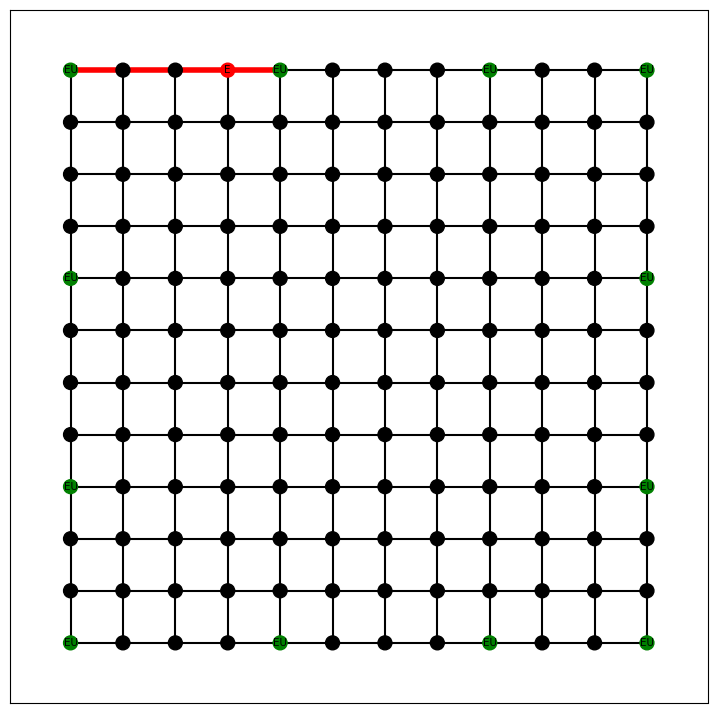

In [8]:
obs = 2
colors = [ color_map[obs].get(node) for node in city.city_graph.nodes]
plt.figure(1, figsize = (9,9))
nx.draw_networkx_nodes(city.city_graph, pos, node_color = colors, node_size = 100)
nx.draw_networkx_edges(city.city_graph,pos,edge_color='black',width=1.5)
nx.draw_networkx_labels(city.city_graph, pos, node_identifier[obs], font_size=7.5, font_color='black')
nx.draw_networkx_edges(city.city_graph,pos,edgelist=edges_to_draw[obs],edge_color='r',width=4)
plt.show()